In [ ]:
'''
Solving missing values to achieve clean and useful dataset
As a financial data consultant, an investor has tasked your team  with identifying new business opportunities to help decide 
 which companies valued more than $1 billion to invest in in the future.
1. The companies in `hardware` industry are based in either Beijing, San Francisco  or London
2. Companies in AI industry are based in London
3. A list of the top 20 countries sorted by sum of company valuations in each country, excluding `USA`, `China`, `India`, and `UK`
4. A global valuation map of all countries with companies that joined the list after 2020
5. A global valuation map of all countries except USA, China, India and UK
The dataset includes a list of businesses and data points, such as the year they were founded, their industry,
and their city, country and continent
'''

In [118]:
#STEP 1
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import plotly.express as px


In [119]:
#load the dataset
df_companies = pd.read_csv('Unicorn_Companies.csv')

In [120]:
#STEP 2 - Data Exploration
#display top 10 rows
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [121]:
#get the shape of the dataset
df_companies.shape

(1074, 10)

In [122]:
#get the data types and number of non-null values 
df_companies.info()
#notice `City` and `Select Investors` columns has fewer count values indicating missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [123]:
#descriptive statitistics
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [124]:
#Data preprocessing
#convert `Date Joined` to `datetime` data type
df_companies['Date Joined'] = pd.to_datetime(df_companies['Date Joined'])

#create `Year Joined` from `Date Joined`
df_companies['Year Joined'] = df_companies['Date Joined'].dt.year
df_companies.head(20)

C:\Users\Doris\AppData\Local\Temp\ipykernel_8560\1038348514.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


In [125]:
#create a `valuation_num` int column from the `Valuation` string column and strip the `$` and `B`
#define a function to strip `$` and `B` and convert the string to `int` datatype
def str_to_num(my_string):
    my_string = my_string.strip('$B')
    my_string = int(my_string)

    return my_string


In [126]:
#create a `valuation_num` column 
df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num)
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [127]:
#check missing values in all the columns
df_companies.isna().sum()
#`City` has 16 missing values and `Select Investors` has one missing value

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
dtype: int64

In [128]:
#review and display rows with missing values to understand the nature of the values
#apply the `isna()` method and assign to `mask` - creates a similar boolean dataframe
mask = df_companies.isna()
mask.tail()
mask.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
#find the indices of rows that contain atleast one `True`, indicating missing values
#use `any()` on the mask
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [130]:
#filter the missing rows in the `mask` dataframe and assign to `df_missing_rows` data frame
df_missing_rows = df_companies[mask]
df_missing_rows

#companies with missing `City` are in Singapore, Bahamas and HongKong
#12 of the missing `City` companies are in Singapore, 3 in HongKong - Asia continent
#Check with the database owner to get inteligent response on the missing data

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [131]:
#STEP 3 - Model Building
#2 ways to deal with missing values - delete or imput values
#first store the original dataset
#store the total number of values in a variable called `count_total`
count_total = df_companies.size
count_total

12888

In [132]:
#now remove all the rows containing missing values and store the dataset in`count_dropna_rows`
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

In [83]:
#remove all columns with missing values
count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

In [133]:
#print percentage of values droped by removing the rows
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

#print percentage of values removed by dropping columns
col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

#the percentage change in rows is smaller than coulns, rows have many entries compared to columns.
#dropping missing values depends on the amount of data and the impact it would cause to the final analysis

Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


In [134]:
#imputing missing values - use `fillna()` method
#assign the imputed dataframe to `df_companies_backfill` - fills with the previous city entry
df_companies_backfill = df_companies.fillna(method='backfill')

#show rows that previously had missing values
df_companies_backfill.iloc[df_missing_rows.index, :]

C:\Users\Doris\AppData\Local\Temp\ipykernel_8560\1939864727.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [135]:
#backfilling does not consider the context, it fills with the subsequent value

In [136]:
#STEP 4 - Results and Evaluation
#1. companies in the `hardware` industry in Beijing, Francisco, and London and `Artificial Intelligence` industry in London
#(Industry==Hardware) and (City==Beijing, London, or San Francisco))
# or (Industry==Artificial intelligence) and (City==London)
#create a boolean mask using conditional logic
cities = ['Beijing', 'London', 'San Francisco']
mask = ((df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
        ) | (
            (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London'))

#apply the mask to `df_companies` dataframe and assigm results to `df_invest`
df_invest = df_companies[mask]
df_invest


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


In [137]:
#2. List of top 20 companies by valuation
#group the dataframe by`Country/Region`
country_valuations = df_companies.groupby(['Country/Region'])['valuation_num'].sum().sort_values(ascending=False).reset_index()

#list the top 20
country_valuations.head(20)

#USA, China, India and UK top the list with highest valuations

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


In [138]:
#top 20 without the first 4 (USA, China, India, UK)
country_valuations_no_big4 = country_valuations.iloc[4:, :]
country_valuations_no_big4.head(20)

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


In [139]:
#4. global valuations of companies that joined after 2020
mask = df_companies['Year Joined'] > 2020
country_joined_after_2020 = df_companies[mask]
country_joined_after_2020


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,20
18,Miro,$18B,2022-01-05,Internet software & services,San Francisco,United States,North America,2011,$476M,"Accel, AltaIR Capital, Technology Crossover Ve...",2022,18
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,14
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,XForcePlus,$1B,2021-06-01,Internet software & services,Shanghai,China,Asia,2015,$200M,"Eastern Bell Capital, Danhua Capital, MSA Capital",2021,1
1067,YipitData,$1B,2021-12-06,Internet software & services,New York,United States,North America,2008,$492M,"RRE Ventures+, Highland Capital Partners, The ...",2021,1
1068,Yunxuetang,$1B,2021-03-29,Edtech,Suzhou,China,Asia,2011,$389M,"Matrix Partners China, Sequoia Capital China, ...",2021,1
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1


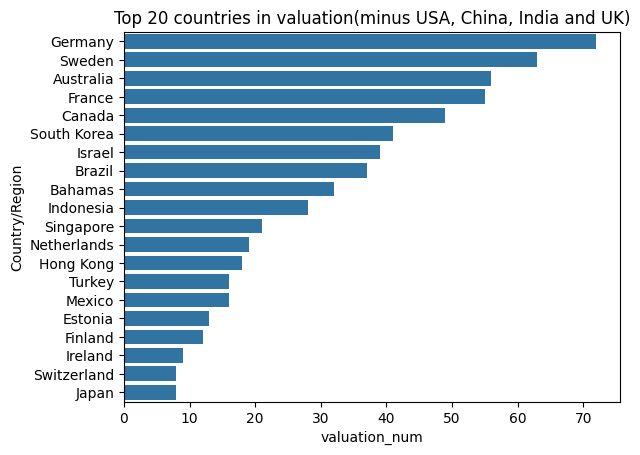

In [140]:
#graphical representation of the top 20 without the big4(USA, China, India, UK)
#barplot
sns.barplot(data=country_valuations_no_big4.head(20), 
            y='Country/Region',
            x='valuation_num')

plt.title('Top 20 countries in valuation(minus USA, China, India and UK)')
plt.show()

In [147]:
#5. Global map representation minus the big4
data = country_valuations_no_big4

px.scatter_geo(data,
               locations='Country/Region',
               size='valuation_num',
               locationmode='country names',
               color='Country/Region',
               title='Total company valuation by country(non-big4)')
#Europe has many unicorns concentrated in a particular area

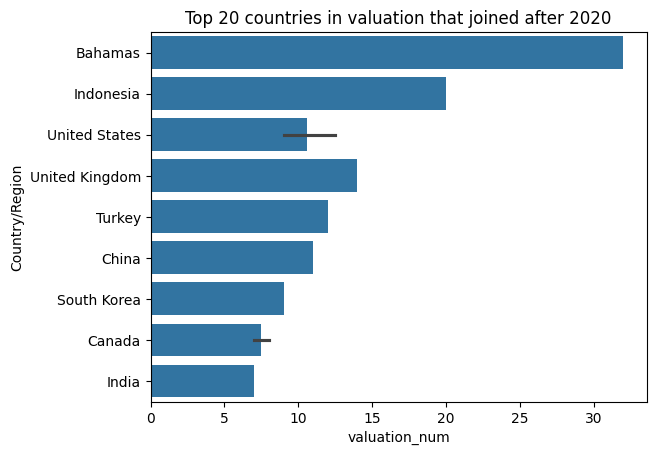

In [142]:
#6. Global represenation of all countries that joined after 2020
#graph representation
sns.barplot(data=country_joined_after_2020.head(20), 
            y='Country/Region',
            x='valuation_num')

plt.title('Top 20 countries in valuation that joined after 2020')
plt.show()





In [143]:
#global map representation of countires with companies that joined after 2020
data = country_joined_after_2020

px.scatter_geo(data,
               locations='Country/Region',
               size='valuation_num',
               locationmode='country names',
               color='Country/Region',
               title='Global representation of Companies that joined after 2020')


In [144]:
# Africa-based companies
mask = df_companies['Continent']=='Africa'
africa_companies = df_companies[mask]
africa_companies


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
484,Wave,$2B,2021-09-07,Fintech,Dakar,Senegal,Africa,2018,$200M,"Stripe, Founders Fund, Partech Partners",2021,2
585,Opay,$2B,2021-08-23,Fintech,Lagos,Nigeria,Africa,2018,$570M,"Sequoia Capital China, Source Code Capital, Re...",2021,2
607,Cell C,$1B,2017-08-07,Mobile & telecommunications,Midrand,South Africa,Africa,2000,$547M,"Blue Label Telecoms, Net1 UEPS Technologies",2017,1


In [145]:
#group by continent
company_by_continent = df_companies.groupby(['Continent'])['Company'].count().sort_values(ascending=False).reset_index()
company_by_continent

,Continent,Company
0,North America,589
1,Asia,310
2,Europe,143
3,South America,21
4,Oceania,8
5,Africa,3


In [146]:
#how many companies joined unicorn after 2020
mask = df_companies['Year Joined'] > 2020
country_joined_after_2020 = df_companies[mask].count()['Company']
print(f'Number of companies that joined Unicorn after 2020: {country_joined_after_2020}')

Number of companies that joined Unicorn after 2020: 636


In [ ]:
#Takeaways
#1. Missing data is part of cleaning and EDA process
#2. Addressing missing values is important
#3. How to handle missing values depends on the dataset size, business, and the questions that
  # need to be answered - You can `drop`` the missing values or `backfill` them
#4. Address missing values inorder to answer the analysis questions